In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


In [2]:
df = pd.read_excel('NEER_Economic_Indicators.xlsx', sheet_name = 'main')
df.date = pd.to_datetime(df.date.astype(str), format = '%Y-%d-%m') #convert to correct datetime format
df.index = df.date
df.drop('date', inplace=True, axis = 1)

In [3]:
df.head()
df_main = df.iloc[:,:3]

In [4]:
df_main

,neer,cpi,import_price_index
date,,,
2011-01-01,102.96,90.405,113.030
2011-02-01,103.11,90.339,115.507
2011-03-01,103.11,90.458,116.868
2011-04-01,103.72,90.774,117.220
2011-05-01,104.23,91.318,115.186
...,...,...,...
2020-10-01,110.93,99.711,90.992
2020-11-01,110.64,100.105,91.761
2020-12-01,110.62,100.469,93.418


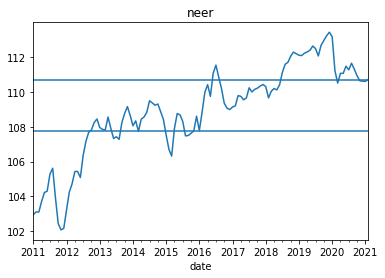

In [5]:
plt.title('neer')
df.neer.plot()
plt.axhline(np.percentile(df.neer,25))
plt.axhline(np.percentile(df.neer,75))

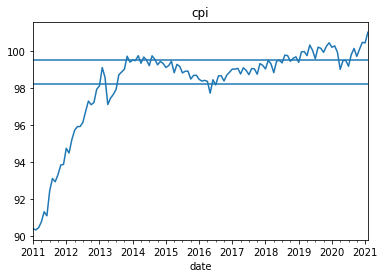

In [6]:
plt.title('cpi')
df.cpi.plot()
plt.axhline(np.percentile(df.cpi,25))
plt.axhline(np.percentile(df.cpi,75))

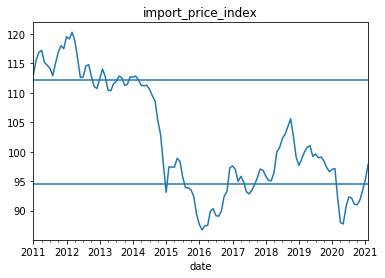

In [7]:
plt.title('import_price_index')
df.import_price_index.plot()
plt.axhline(np.percentile(df.import_price_index,25))
plt.axhline(np.percentile(df.import_price_index,75))

In [8]:
df_main.corr("pearson")

,neer,cpi,import_price_index
neer,1.000000,0.835249,-0.668606
cpi,0.835249,1.000000,-0.594145
import_price_index,-0.668606,-0.594145,1.000000


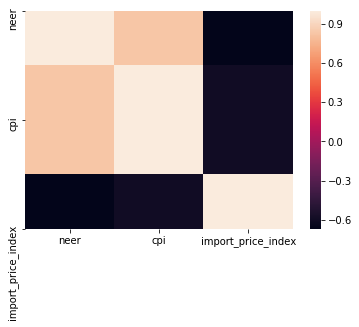

In [9]:
sns.heatmap(df_main.corr("pearson"));

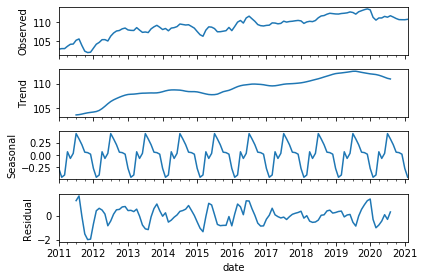

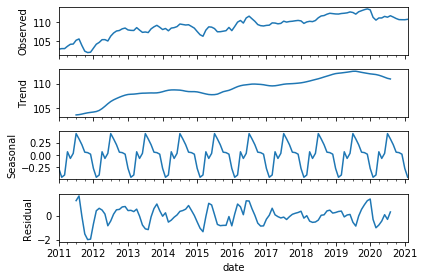

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['neer'], freq=12).plot()

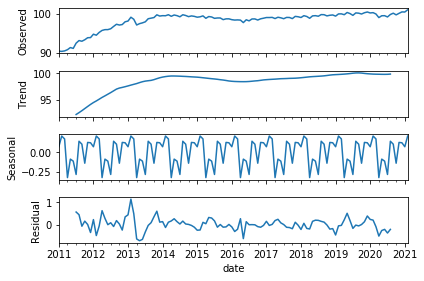

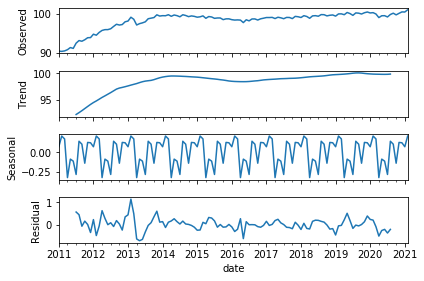

In [11]:
seasonal_decompose(df['cpi'], freq=12).plot()

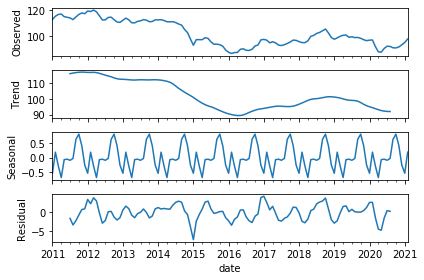

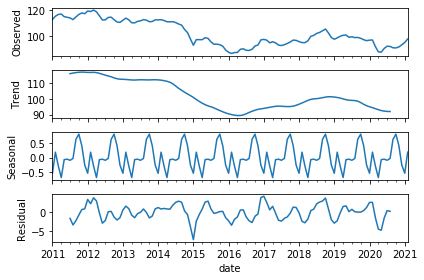

In [12]:
seasonal_decompose(df['import_price_index'], freq=12).plot()